## 1.Setup
importing the required libraries and loading the dataset.  
This dataset contains Premier League matches with results, odds, and engineered features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../PL11.csv")
df.head()


,Unnamed: 0,HomeTeam,AwayTeam,BbAvH,BbAvD,BbAvA,FTR,AwayTeamGoals,HomeTeamConceded,AwayTeamConceded,HomeTeamGoals,Weekday
0,0,Arsenal,Aston Villa,1.40,4.68,7.87,A,1.24,1.23,1.54,1.55,5.0
1,1,Liverpool,Stoke,1.38,4.54,8.88,H,1.24,1.23,1.54,1.55,5.0
2,2,Norwich,Everton,3.12,3.27,2.31,D,1.24,1.23,1.54,1.55,5.0
3,3,Sunderland,Fulham,2.22,3.30,3.29,A,1.24,1.23,1.54,1.55,5.0
4,4,Swansea,Man United,3.84,3.40,1.99,A,1.24,1.23,1.54,1.55,5.0


## 2. Basic Dataset Information
Before analysis check:
- Dataset shape, column types, and null values using (`.info()`).
- Basic statistics of numeric features using (`.describe()`).
- Distribution of the target variable (`FTR`: Home Win, Draw, Away Win).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4181 entries, 0 to 4180
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4181 non-null   int64  
 1   HomeTeam          4180 non-null   object 
 2   AwayTeam          4180 non-null   object 
 3   BbAvH             4180 non-null   float64
 4   BbAvD             4180 non-null   float64
 5   BbAvA             4180 non-null   float64
 6   FTR               4180 non-null   object 
 7   AwayTeamGoals     4181 non-null   float64
 8   HomeTeamConceded  4181 non-null   float64
 9   AwayTeamConceded  4181 non-null   float64
 10  HomeTeamGoals     4181 non-null   float64
 11  Weekday           4180 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 392.1+ KB


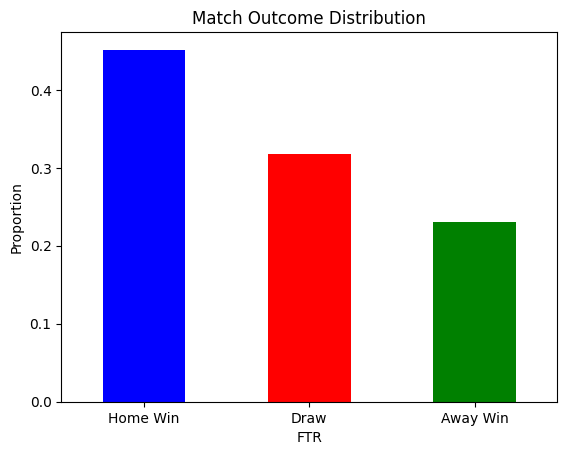

In [ ]:
df.info()
df.describe()

df['FTR'].value_counts(normalize=True).plot(kind='bar', color=['blue','red','green'])
plt.xticks(ticks=[0,1,2], labels=['Home Win','Draw','Away Win'], rotation=0)
plt.title("Match Outcome Distribution")
plt.ylabel("Proportion")
plt.show()


## 3. Betting Odds Distribution (Before Normalization)

The dataset contains bookmaker odds for Home, Draw, and Away outcomes.  
We plot their distributions to see how odds are typically set across matches.

keep in mind that:
- Lower odds = higher probability assigned by bookmakers.
- Higher odds = less likely outcome.


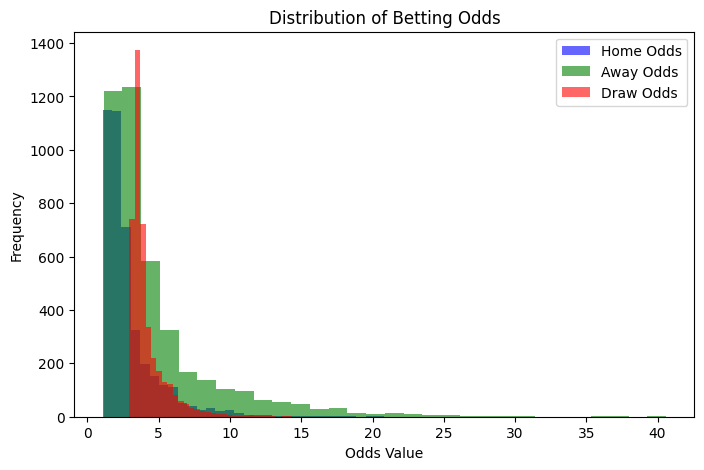

In [18]:
plt.figure(figsize=(8,5))
plt.hist(df["BbAvH"], bins=30, alpha=0.6, label="Home Odds" , color="Blue")
plt.hist(df["BbAvA"], bins=30, alpha=0.6, label="Away Odds" , color="Green")
plt.hist(df["BbAvD"], bins=30, alpha=0.6, label="Draw Odds" , color="Red")
plt.xlabel("Odds Value")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Betting Odds")
plt.show()


## 4. Feature Correlations

We check correlations between numerical features.  
This helps identify Which variables are strongly related to match outcomes.


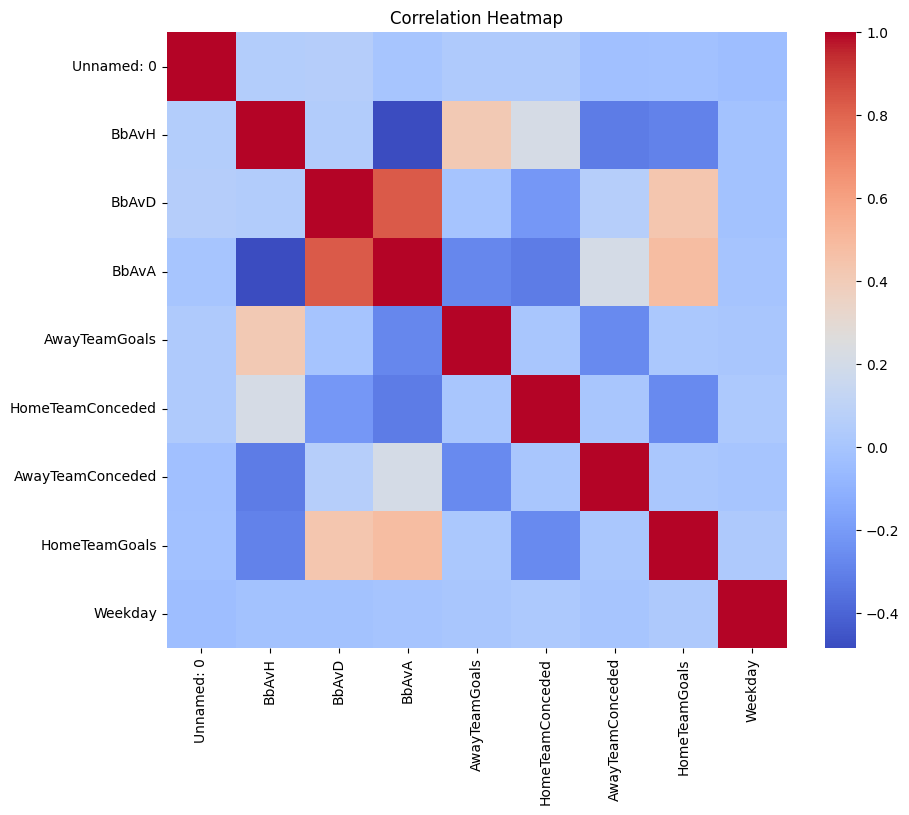

In [3]:
import seaborn as sns

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


## 5. Outcome vs Odds

Finally, we compare the average odds across actual match results.

This validates whether betting odds align with real outcomes.


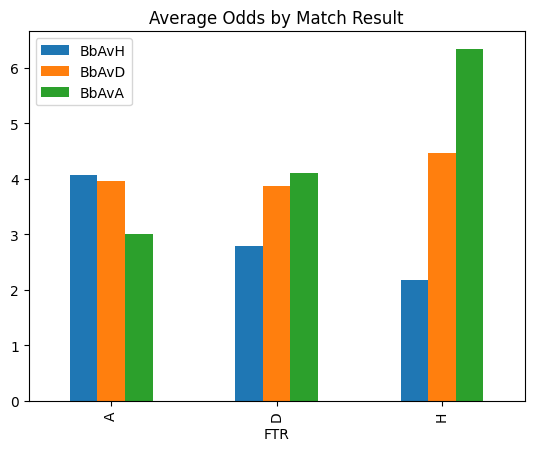

In [29]:
df.groupby("FTR")[["BbAvH","BbAvD","BbAvA"]].mean().plot(kind="bar")
plt.title("Average Odds by Match Result")
plt.show()
